In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import qiskit
print("success")

success


In [11]:
from qiskit.visualization import  plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state 

In [12]:
# Loading IBM Quantum Account 
provider = qiskit.IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-07-17 18:45:20,069: Credentials are already in use. The existing account in the session will be replaced.


### Teleportation Protocol

In [13]:
qr = qiskit.QuantumRegister(3, name='q')
crz = qiskit.ClassicalRegister(1, name ='crz')
crx = qiskit.ClassicalRegister(1, name ='crx')
teleportation_circuit = qiskit.QuantumCircuit(qr,crz, crx)

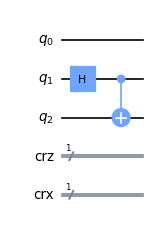

In [14]:
# Create Bell Pair 
def create_bell_pair(qc,a,b):
    '''qc -> Quantum circuit
        a -> index of qubit
        b -> index of qubit
        crete bell pair between ath and bth qubits'''
    qc.h(a) # Creating Hadamard Gate on ath qubits
    qc.cx(a,b) # create controlled not on b respect to a 
create_bell_pair(teleportation_circuit,1,2)
teleportation_circuit.draw(scale=.6)

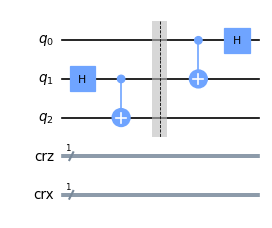

In [15]:
def create_sender_gate(qc, a,b):
    '''qc -> Quantum circuit
        a -> index of qubit
        b -> index of qubit
        crete reverse bell pair to decode message'''
    qc.cx(a,b)
    qc.h(a)
teleportation_circuit.barrier()
create_sender_gate(teleportation_circuit,0,1)
teleportation_circuit.draw(scale=.6)

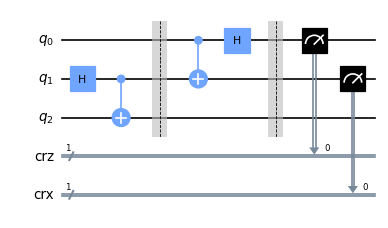

In [16]:
def sender_measure_and_send(qc,a,b):
    '''qc -> Quantum circuit
        a -> index of qubit
        b -> index of qubit
        measure a and b and store 0 and 1 classical registe '''
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)
sender_measure_and_send(teleportation_circuit,0,1)
teleportation_circuit.draw(scale=.6)

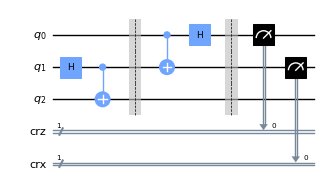

In [17]:
teleportation_circuit.draw(scale=.5)

In [18]:
def reciver_side_gate(qc,qubit,crz,crx):
    ''' qc - > quantum circuit 
        crz , crx ->  two clasical register to control Z and Y gate 
        change state of qubit respect to crz and crx '''
    qc.x(qubit).c_if(crx,1) # c_if is control statement respect to clasical bit 
    qc.z(qubit).c_if(crz,1)
    
    

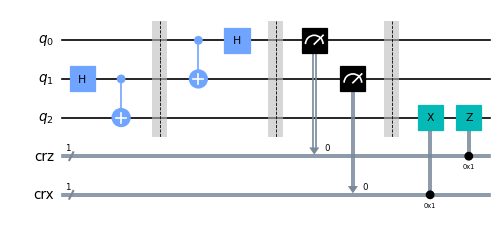

In [19]:
teleportation_circuit.barrier()
reciver_side_gate(teleportation_circuit, 2, crz,crx)
teleportation_circuit.draw(scale=.6)


### Random State  Init

numpy.ndarray

<IPython.core.display.Latex object>

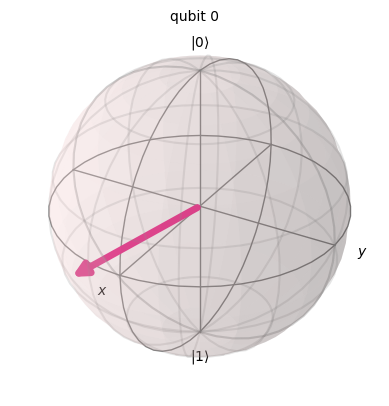

In [20]:
psi = random_state(1)
display(type(psi))
display(array_to_latex(psi, prefix = "|\\psi\\rangle = "))
plot_bloch_multivector(psi)

In [21]:
init_qubit  = Initialize(psi) # Initialize is an operator class give an quantum operator that initialize the state of qubit as given state 
init_qubit.label="init state"
init_qubit

Instruction(name='initialize', num_qubits=1, num_clbits=0, params=[(-0.4039263476847418-0.4418502372718539j), (-0.7722176295421777-0.21281871650099662j)])

### Quantum Teleportation Circuit 

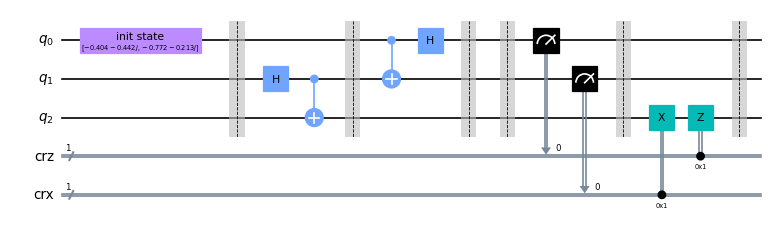

In [22]:
# Creating Register and circuit 
qr = qiskit.QuantumRegister(3, name='q')
crz = qiskit.ClassicalRegister(1, name ='crz')
crx = qiskit.ClassicalRegister(1, name ='crx')

# Define Circuit
qc = qiskit.QuantumCircuit(qr,crz,crx)

# STEP 0 : Initialize the sender information with random state 
qc.append(init_qubit,[0])
qc.barrier()

# STEP 1 : creating Bell Pair
create_bell_pair(qc, 1,2)
qc.barrier()

# STEP 2: creating sending q0 bit 
create_sender_gate(qc,0,1)
qc.barrier()

# STEP 3: Measure and send clasical bit
sender_measure_and_send(qc,0,1)
qc.barrier()

# STEP 4: Reciving quantum information 
reciver_side_gate(qc,2,crz,crx)
qc.barrier()

qc.draw(scale=.6)

### Test and Run The Circuit

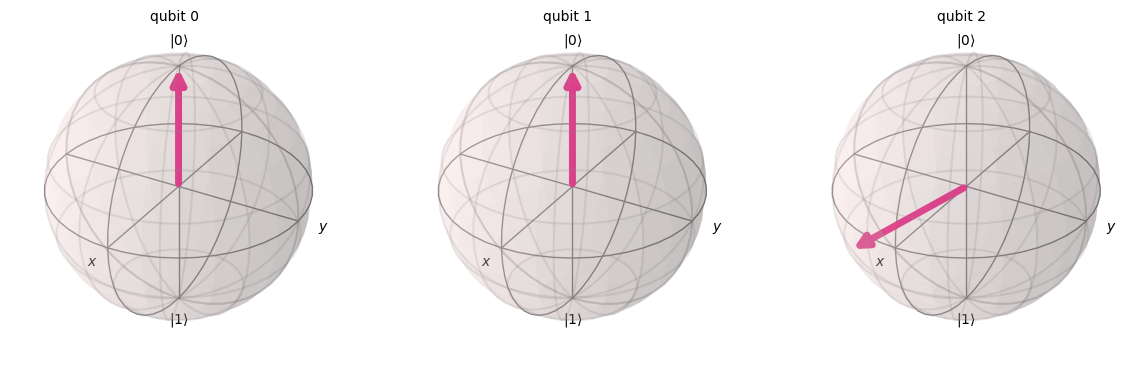

In [23]:
sim = qiskit.Aer.get_backend('aer_simulator')
qc.save_statevector()
result = sim.run(qc).result()
out_vector = result.get_statevector()
plot_bloch_multivector(out_vector)